![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import re
import datetime
from datetime import datetime


import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
40238,id_1731,London,"['European', 'British', 'Vegetarian Friendly',...",1734.0,$$ - $$$,155.0,"[['Great for drinks', 'Stunning London views &...",/Restaurant_Review-g186338-d11908107-Reviews-A...,d11908107,1,4.0
44100,id_14928,London,"['Asian', 'Chinese']",14939.0,$$ - $$$,33.0,"[['Friends', 'Awful'], ['10/16/2017', '10/01/2...",/Restaurant_Review-g186338-d4911476-Reviews-Oa...,d4911476,1,3.0
29276,id_4708,Paris,['Thai'],4709.0,$$ - $$$,64.0,[['Cheap Authentic Thai Eats Near the Train S....,/Restaurant_Review-g187147-d3639376-Reviews-Kh...,d3639376,1,4.0
7881,id_7881,Hamburg,NaN,2550.0,NaN,7.0,"[[], []]",/Restaurant_Review-g187331-d5507511-Reviews-La...,d5507511,0,0.0
37729,id_12830,Paris,"['French', 'Cafe', 'European']",12832.0,$$ - $$$,709.0,"[['Good for a snack!', 'Good Spot for Lunch'],...",/Restaurant_Review-g187147-d714903-Reviews-Caf...,d714903,1,3.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

## Предварительный анализ данных
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, даже отсутствие информации может быть важным признаком!
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак

### 1.'Number of Reviews'

In [15]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [17]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

In [18]:
data['Number of Reviews'].isna().value_counts()

False    50000
Name: Number of Reviews, dtype: int64

### 2.'Price Range'

In [19]:
# создаем признак 'Price Range_isNAN',который содержит инфо о пропусках
data['Price Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

In [20]:
# для заполнения пропусков находим самое распространенное значение признака:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

In [21]:
# Заполняем пропуски средним ценовым диапазоном:
data['Price Range'] = data['Price Range'].fillna('$$ - $$$')

In [22]:
data['Price Range'].isna().value_counts()

False    50000
Name: Price Range, dtype: int64

### 3.'Cuisine Style'

In [23]:
data['Cuisine Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [24]:
data['Cuisine Style_isNAN'].value_counts()

0    38410
1    11590
Name: Cuisine Style_isNAN, dtype: int64

In [25]:
# заполняем пропуски 'European' с "лишними" символами, как и в других ячейках
data['Cuisine Style'] = data['Cuisine Style'].fillna("['European']")

In [26]:
data['Cuisine Style'].isna().value_counts()

False    50000
Name: Cuisine Style, dtype: int64

###  Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [27]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10731
Ranking                    12975
Price Range                    3
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
Price Range_isNAN              2
Cuisine Style_isNAN            2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [28]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [29]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,id_2,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,id_3,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,id_4,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
40358,id_1345,['European'],1357.0,$$ - $$$,3.0,"[[], []]",/Restaurant_Review-g187309-d5610185-Reviews-Ku...,d5610185,1,5.0,...,0,0,0,0,0,0,0,0,0,0
6755,id_6755,['European'],3060.0,$$ - $$$,0.0,"[[], []]",/Restaurant_Review-g274707-d12333763-Reviews-P...,d12333763,0,0.0,...,0,0,0,1,0,0,0,0,0,0
39866,id_11192,"['Italian', 'Cafe']",11202.0,$$ - $$$,89.0,"[['Nice lunch ....', 'A shopping break'], ['10...",/Restaurant_Review-g186338-d3750479-Reviews-Ca...,d3750479,1,3.5,...,0,0,0,0,0,0,0,0,0,0
3562,id_3562,"['German', 'European', 'Central European', 'Co...",565.0,$$$$,65.0,[['Ecological food in excellent quality and a....,/Restaurant_Review-g187331-d3700226-Reviews-Lo...,d3700226,0,0.0,...,0,0,0,0,0,0,0,0,0,0
14353,id_1150,"['Italian', 'Pizza', 'Mediterranean', 'Vegetar...",1151.0,$$ - $$$,691.0,"[['Nice atmosphere, good pizza', 'Went twice']...",/Restaurant_Review-g187791-d814986-Reviews-Piz...,d814986,1,4.0,...,0,0,0,0,1,0,0,0,0,0


### 1."Price Range".

In [31]:
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [32]:
def price_marker(price):
    # функция маркировки цен порядковыми числами 1, 2, 3:
    if price == '$':
        price = 1
        return price
    elif price == '$$$$':
        price = 3
        return price
    price = 2
    return price

# создаем новый признак - маркированные цены:
data['Price marked'] = data['Price Range'].apply(price_marker)



### 2."City"

In [33]:
data_City_dummies = pd.get_dummies(data['City'], dummy_na=False).astype('float64')
data = pd.concat([data,data_City_dummies], axis=1)


KeyError: 'City'

In [34]:
le = LabelEncoder()
le.fit(data['City'])
data['code_City'] = le.transform(data['City'])

KeyError: 'City'

In [35]:
list_Of_NotCapitalCity = ['Barcelona', 'Milan', 'Hamburg', 'Munich', 
                          'Lyon', 'Zurich', 'Oporto', 'Geneva', 'Krakow']
data['Capital_City'] = data['City'].apply(lambda x: 0.0 if x in list_Of_NotCapitalCity else 1.0)

KeyError: 'City'

In [36]:
dict_Сountries = {'London' : 'England', 'Paris' : 'France', 'Madrid' : 'Spain', 
                  'Barcelona' : 'Spain', 'Berlin' : 'Germany', 'Milan' : 'Italy', 
                  'Rome' : 'Italy', 'Prague' : 'Czech_c', 'Lisbon' : 'Portugal', 
                  'Vienna' : 'Austria', 'Amsterdam' : 'Holland', 
                  'Brussels' : 'Belgium', 'Hamburg' : 'Germany', 'Munich' : 'Germany', 
                  'Lyon' : 'France', 'Stockholm' : 'Sweden', 'Budapest' : 'Romania', 
                  'Warsaw' : 'Poland', 'Dublin' : 'Ireland', 'Copenhagen' : 'Denmark', 
                  'Athens' : 'Greece', 'Edinburgh' : 'Scotland', 'Zurich' : 'Switzerland', 
                  'Oporto' : 'Portugal', 'Geneva' : 'Switzerland', 'Krakow' : 'Poland', 
                  'Oslo' : 'Norway', 'Helsinki' : 'Finland', 'Bratislava' : 'Slovakia', 
                  'Luxembourg' : 'Luxembourg_c', 'Ljubljana' : 'Slovenia'}
data['Сountry'] = data.apply(lambda row: dict_Сountries[row['City']], axis = 1)

le = LabelEncoder()
le.fit(data['Сountry'])
data['code_Сountry'] = le.transform(data['Сountry'])

KeyError: ('City', 'occurred at index 0')

In [37]:
dict_Сity_population= {'London' : 8908, 'Paris' : 2206, 'Madrid' : 3223, 'Barcelona' : 1620, 
                        'Berlin' : 6010, 'Milan' : 1366, 'Rome' : 2872, 'Prague' : 1308, 
                        'Lisbon' : 506, 'Vienna' : 1888, 'Amsterdam' : 860, 'Brussels' : 179, 
                        'Hamburg' : 1841, 'Munich' : 1457, 'Lyon' : 506, 'Stockholm' : 961, 
                        'Budapest' : 1752, 'Warsaw' : 1764, 'Dublin' : 553, 
                        'Copenhagen' : 616, 'Athens' : 665, 'Edinburgh' : 513, 
                        'Zurich' : 415, 'Oporto' : 240, 'Geneva' : 201, 'Krakow' : 769, 
                        'Oslo' : 681, 'Helsinki' : 643, 'Bratislava' : 426, 
                        'Luxembourg' : 119, 'Ljubljana' : 284}
data['Сity_population'] = data.apply(lambda row: dict_Сity_population[row['City']], axis = 1)

KeyError: ('City', 'occurred at index 0')

City: Без пропусков, категориальный признак. Сгенерированы новые признаки города по типу dummies, также создан новый критерий code_City с кодировкой LabelEncoder из библиотеки sklearn
Добавлены новые критерии:

Capital_City - столица

code_Сountry - код страны с помощью LabelEncoder

Сity_population - население города (тыс. чел.)

### 3.'Cuisine Style'

In [38]:
# получаем новый признак "количество видов кухонь в ресторане"
# для этого чистим строки от ненужных символов и преобразовываем в списки:
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: str(x)[1:-1])
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.replace("'",""))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.replace(" ",""))
data['Cuisine Style'] = data['Cuisine Style'].apply(lambda x: x.split(","))

In [39]:
# новый признак - "количество видов кухонь в ресторане":
data['Number of Cuisines'] = data['Cuisine Style'].apply(lambda x: len(x))

In [40]:
# составим список всех уникальных кухонь в датасете:
cuisine_list = []
for i in data['Cuisine Style']:
    for j in i:
        cuisine_list.append(j)
# создаем словарь с уникальными кухнями:
cuisine_collections = Counter(cuisine_list)
# из этого список уникальных кухонь:
cuisine_list = list(cuisine_collections.keys())
print("в датасете {} уникальных кухонь".format(len(cuisine_list)))

в датасете 125 уникальных кухонь


In [41]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Price marked,Number of Cuisines
0,id_0,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,1,0,0,0,0,0,0,0,2,2
1,id_1,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,2,5
2,id_2,[VegetarianFriendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,0,0,0,0,2,1
3,id_3,"[Italian, Mediterranean, European, VegetarianF...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,0,0,0,0,3,5
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,0,0,0,0,3,6


### 4.'Reviews'

In [42]:

# выделяем из него даты и переводим в формат Datetime
pattern = re.compile('\d\d/\d\d/\d\d\d\d')
data['Reviews'] = data['Reviews'].fillna('')
data['Review_dates'] = data['Reviews'].apply(lambda x: pattern.findall(x))
data['Review_1'] = data['Review_dates'].apply(lambda x: x[:1])
data['Review_2'] = data['Review_dates'].apply(lambda x: x[1:])

In [43]:
# заполняем пропуски самым частым значением для каждого столбца ревью:
for i in range(len(data['Review_1'])):
    if len(data['Review_1'][i]) == 0:
        data['Review_1'][i].append('01/07/2018')
for i in range(len(data['Review_2'])):
    if len(data['Review_2'][i]) == 0:
        data['Review_2'][i].append('01/03/2018')

In [44]:
# переводим в формат Datetime:
data['Review_1'] = data['Review_1'].apply(
                   lambda x: datetime.strptime(x[0], '%m/%d/%Y'))
data['Review_2'] = data['Review_2'].apply(
                   lambda x: datetime.strptime(x[0], '%m/%d/%Y'))
data.drop(['Review_dates'], axis=1, inplace=True)

In [45]:
# создаем новый признак 'Review_Delta' с разницей в днях между ревью:
data['Review_Delta'] = data['Review_1'] - data['Review_2']
data['Review_Delta'] = data['Review_Delta'].apply(lambda x: x.days)

In [46]:
# создаем новый признак 'How_old_Review':
# старость ревью относительно самого свежего:
newest_review = data['Review_1'].max()
data['How_old_Review'] = data['Review_1'].apply(
                         lambda x: (newest_review - x).days)

In [47]:
data.head(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Vienna,City_Warsaw,City_Zurich,City_nan,Price marked,Number of Cuisines,Review_1,Review_2,Review_Delta,How_old_Review
0,id_0,"[Bar, Pub]",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,0,0,2,2,2018-01-07,2018-01-03,4,50
1,id_1,"[European, Scandinavian, GlutenFreeOptions, Ve...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,2,5,2017-12-05,2017-10-29,37,83
2,id_2,[VegetarianFriendly],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,...,0,0,0,0,2,1,2017-12-28,2017-12-06,22,60
3,id_3,"[Italian, Mediterranean, European, VegetarianF...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,...,0,0,0,0,3,5,2017-12-06,2017-11-22,14,82
4,id_4,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,...,0,0,0,0,3,6,2018-02-08,2018-01-24,15,18


# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

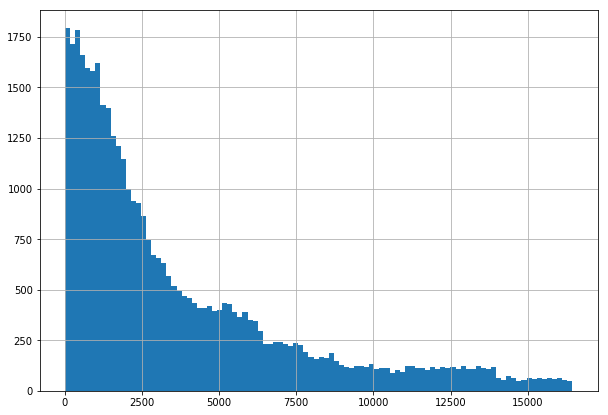

In [48]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

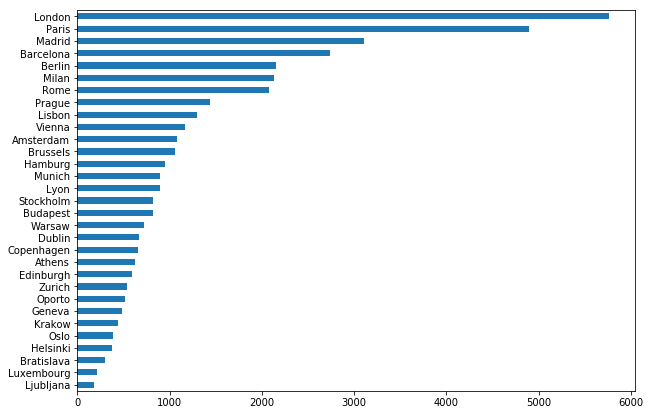

In [49]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

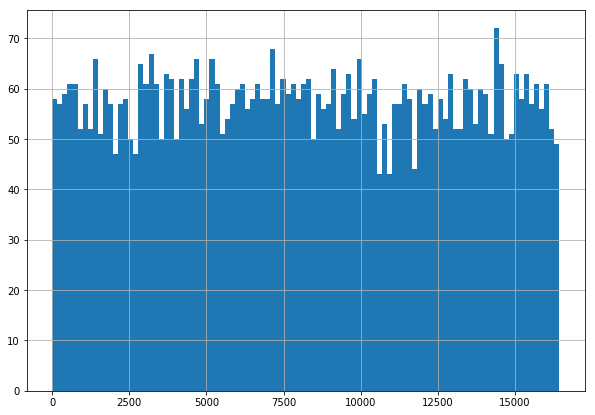

In [50]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

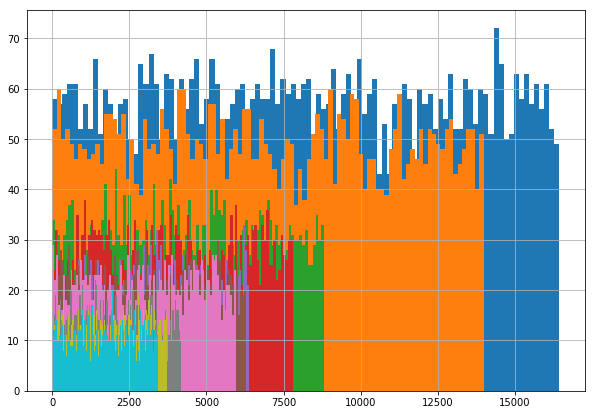

In [51]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

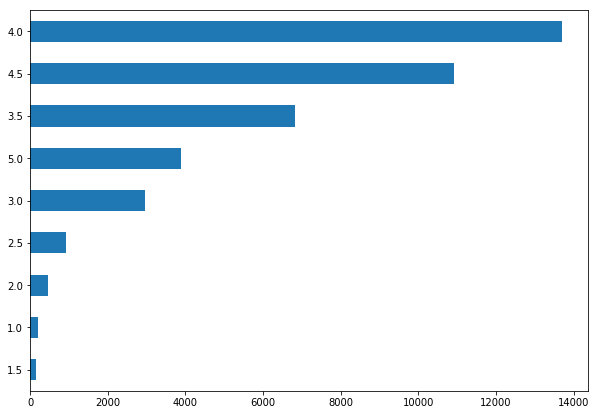

In [52]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

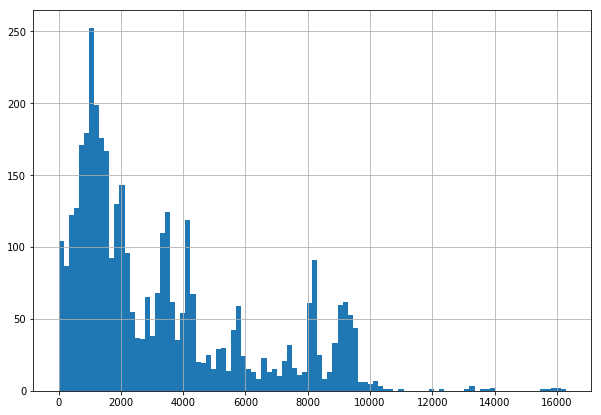

In [53]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

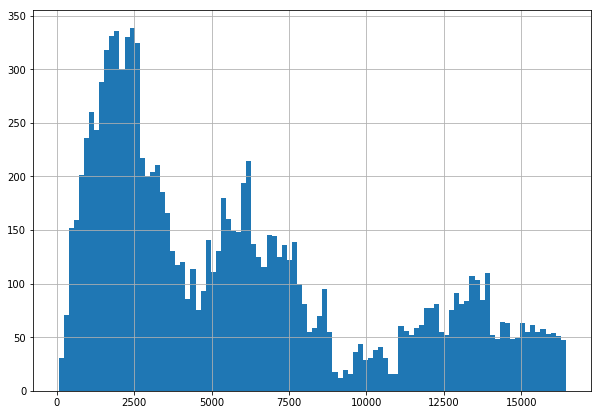

In [54]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

## Сопоставим города и рейтинги при помощи boxplot

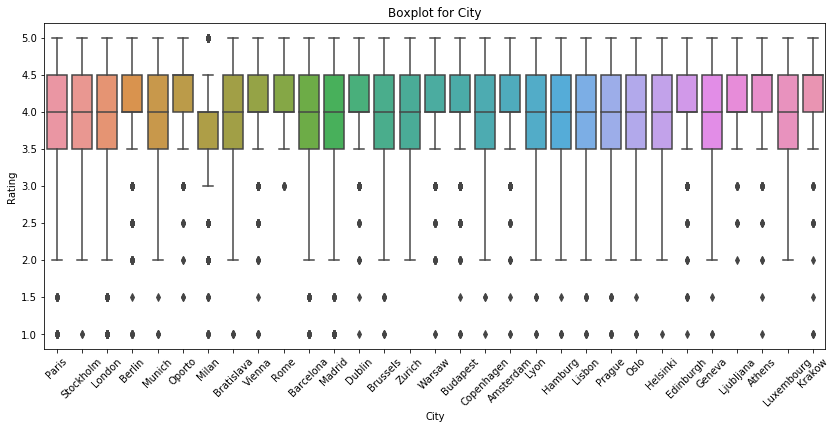

In [55]:
# рейтинг по городам:
fig, ax = plt.subplots(figsize = (14, 6))
sns.boxplot(x='City', y='Rating', data=df_train, ax=ax)
plt.xticks(rotation=45)
ax.set_title('Boxplot for ' + 'City')
plt.show()

среднее значение рейтинга 4.0, не зависит от города. Точки-"выбросы" выбросами не считаем, так как они вписываются в пределы 0...5

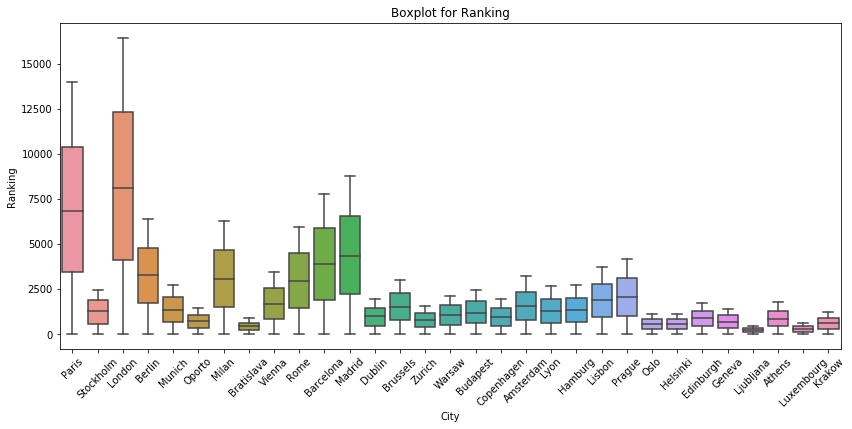

In [56]:
# ранги ресторанов по городам
fig, ax = plt.subplots(figsize = (14, 6))
sns.boxplot(x='City', y='Ranking', data=df_train, ax=ax)
plt.xticks(rotation=45)
ax.set_title('Boxplot for ' + 'Ranking')
plt.show()

 Видно, что абсолютные значения ранга сильно зависят от размера города (количества ресторанов в нем)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [57]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [58]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''

    df_output = df_input.copy()

    # ################### 1. Предобработка ##########################
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)

    # ################### 2. NAN ####################################
    # Заполняем пропуски (попутно создавая признаки, которые показывают пропуски):
    df_output['Number_of_Reviews_isNAN'] = pd.isna(
                                   df_output['Number of Reviews']).astype('uint8')
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # пропуски в ценах заполняем самым массовым - средним ценовым диапазоном:
    df_output['Price Range_isNAN'] = pd.isna(
                                    df_output['Price Range']).astype('uint8')
    df_output['Price Range'] = df_output['Price Range'].fillna('$$ - $$$')
    # пропуски в кухнях заполняем тремя самыми массовыми,
    # так как заполнение тремя кухнями дает лучший МАЕ, чем заполнение одной кухней
    df_output['Cuisine Style_isNAN'] = pd.isna(
                                       df_output['Cuisine Style']).astype('uint8')
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna(
                         "['European', 'Vegetarian Friendly', 'International']")

    # ################### 3. Encoding #############################
    # переводим города в dummy-переменные:
    amount_of_cities = len(df_output['City'].unique())
    df_output = pd.get_dummies(df_output, columns=['City'],
                               prefix='', prefix_sep='',dummy_na=False)
    city_sum = {}
    for city in df_output.columns[-amount_of_cities:]:
        city_sum[city] = df_output[city].sum()

    # ################### 4. Feature Engineering ##################
    def price_marker(price):
        # функция маркировки цен порядковыми числами 1, 2, 3
        if price == '$':
            price = 1
            return price
        elif price == '$$$$':
            price = 3
            return price
        price = 2
        return price

    # создаем новый признак - маркированные цены
    df_output['Price marked'] = df_output['Price Range'].apply(price_marker)

    # цель следующего шага -
    # получить новый признак "количество видов кухонь в ресторане"
    # для этого чистим строки от лишних символов и преобразовываем в списки:
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
                                 lambda x: str(x)[1:-1])
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
                                 lambda x: x.replace("'",""))
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
                                 lambda x: x.replace(" ",""))
    df_output['Cuisine Style'] = df_output['Cuisine Style'].apply(
                                 lambda x: x.split(","))
    # новый признак - "количество видов кухонь в ресторане":
    df_output['Number of Cuisines'] = df_output['Cuisine Style'].apply(
                                      lambda x: len(x))

    # в ходе работы был составлен список всех уникальных кухонь в датасете
    # он не включен в выходные данные, поэтому приведен в виде комментария:
    # long_cuisine_list = []
    # for i in df_output['Cuisine Style']:
    #     for j in i:
    #         long_cuisine_list.append(j)
    # c = Counter(long_cuisine_list)
    # cuisine_list = list(c.keys())

    # обрабатываем признак 'Reviews':
    #выделяем из него даты и переводим в формат Datetime
    pattern = re.compile('\d\d/\d\d/\d\d\d\d')
    df_output['Reviews'] = df_output['Reviews'].fillna('')
    df_output['Review_dates'] = df_output['Reviews'].apply(
                                lambda x: pattern.findall(x))
    df_output['Review_1'] = df_output['Review_dates'].apply(lambda x: x[:1])
    df_output['Review_2'] = df_output['Review_dates'].apply(lambda x: x[1:])
    # заполняем пропуски самым частым значением для каждого столбца ревью:
    for i in range(len(df_output['Review_1'])):
        if len(df_output['Review_1'][i]) == 0:
            df_output['Review_1'][i].append('01/07/2018')
    for i in range(len(df_output['Review_2'])):
        if len(df_output['Review_2'][i]) == 0:
            df_output['Review_2'][i].append('01/03/2018')
    # переводим в формат Datetime:
    df_output['Review_1'] = df_output['Review_1'].apply(
                            lambda x: datetime.strptime(x[0], '%m/%d/%Y'))
    df_output['Review_2'] = df_output['Review_2'].apply(
                            lambda x: datetime.strptime(x[0], '%m/%d/%Y'))
    df_output.drop(['Review_dates'], axis=1, inplace=True)

    # создаем новый признак 'Review_Delta' с разницей в днях между ревью:
    df_output['Review_Delta'] = df_output['Review_1'] - df_output['Review_2']
    df_output['Review_Delta'] = df_output['Review_Delta'].apply(
                                lambda x: x.days)

    # создаем новый признак 'How_old_Review'-
    # старость ревью относительно самого свежего:
    newest_review = df_output['Review_1'].max()
    df_output['How_old_Review'] = df_output['Review_1'].apply(
                                  lambda x: (newest_review - x).days)

    # создаем признак 'Relative_Ranking' -
    # ранг относителько количества ресторанов в этом городе
    # по данным датасета:
    def rel_rank(row, c_s):
        # функция деления ранга ресторана на количество ресторанов
        # в городе по данным датасета
        for i in c_s.keys():
            if row[i] == 1:
                res = row['Ranking']/c_s[i]
        return res
    df_output['Relative_Ranking'] = df_output.apply(
                                    lambda x: rel_rank(x, city_sum), axis=1)

    # ################### Data from internet ################################
    # население городов с агломерациями по данным wikipedia.org
    # нашел и ввел вручную
    popul_data = {'Amsterdam':827, 'Athens':3168, 'Barcelona':3186,
                  'Berlin':6177, 'Bratislava':700, 'Brussels':1831,
                  'Budapest':2965, 'Copenhagen':1308, 'Dublin':1347,
                  'Edinburgh':507, 'Geneva':496, 'Hamburg':1841,
                  'Helsinki':1299, 'Krakow':1200, 'Lisbon':3000,
                  'Ljubljana':508, 'London':8416, 'Luxembourg':162,
                  'Lyon':1748, 'Madrid':3266, 'Milan':3218,
                  'Munich':1471, 'Oporto':237, 'Oslo':1558,
                  'Paris':10620, 'Prague':1301, 'Rome':3900,
                  'Stockholm':2352, 'Vienna':1897, 'Warsaw':3100,
                  'Zurich':1334}
    # создаем признак 'Population' - население в тыс. жителей:
    def city_popul(row, p_d):
        #функция возвращает значение населения в зависимости от названия города
        for i in p_d.keys():
            if row[i] == 1:
                res = p_d[i]
        return res
    df_output['Population'] = df_output.apply(
                              lambda x: city_popul(x, popul_data), axis=1)

    # создаем признак 'Review to Population' -
    # отношение количества отзывов к населению:
    df_output['Review to Population'] = df_output['Number of Reviews'] \
                                      / df_output['Population']

    # создаем признак 'Rel_Rank to Population' -
    # отношение относ. ранга к населению:
    df_output['Rel_Rank to Population'] = df_output['Relative_Ranking'] \
                                        / df_output['Population']


    # ################### 5. Clean ########################################
    # убираем признаки типов "object" и "Datetime"
    object_columns = [s for s in df_output.columns if \
                      df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)

    df_output.drop(['Review_1'], axis=1,inplace=True)
    df_output.drop(['Review_2'], axis=1, inplace=True)


    return df_output

In [59]:
df_preproc = preproc_data(data)
df_preproc.head(3)

,Ranking,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,Price Range_isNAN,Cuisine Style_isNAN,Amsterdam,Athens,Barcelona,...,Warsaw,Zurich,Price marked,Number of Cuisines,Review_Delta,How_old_Review,Relative_Ranking,Population,Review to Population,Rel_Rank to Population
0,12963.0,4.0,0,0.0,0,0,0,0,0,0,...,0,0,2,2,4,50,2.122299,10620,0.000377,0.000200
1,106.0,97.0,0,0.0,0,0,0,0,0,0,...,0,0,2,5,37,83,0.223158,1299,0.074673,0.000172
2,810.0,28.0,0,0.0,0,0,0,0,0,0,...,0,0,2,1,22,60,1.087248,507,0.055227,0.002144


In [60]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 46 columns):
Ranking                    50000 non-null float64
Number of Reviews          50000 non-null float64
sample                     50000 non-null int64
Rating                     50000 non-null float64
Number_of_Reviews_isNAN    50000 non-null uint8
Price Range_isNAN          50000 non-null uint8
Cuisine Style_isNAN        50000 non-null uint8
Amsterdam                  50000 non-null uint8
Athens                     50000 non-null uint8
Barcelona                  50000 non-null uint8
Berlin                     50000 non-null uint8
Bratislava                 50000 non-null uint8
Brussels                   50000 non-null uint8
Budapest                   50000 non-null uint8
Copenhagen                 50000 non-null uint8
Dublin                     50000 non-null uint8
Edinburgh                  50000 non-null uint8
Geneva                     50000 non-null uint8
Hamburg              

In [61]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [62]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [63]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 45), (40000, 45), (40000, 44), (32000, 44), (8000, 44))

# Model 
Сам ML

In [64]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [65]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [66]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   11.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [67]:
# функция стандартного математического округления
def classic_round(d_num):
    return int(d_num + (0.5 if d_num > 0 else -0.5))

# функция округления кратно 0.5
def my_round(d_pred):
    result = classic_round(d_pred*2)/2
    if result <=5:
        return result
    else:
        return 5
    
# создание функции для векторов np
my_vec_round = np.vectorize(my_round)

In [68]:
y_pred = my_vec_round(y_pred)

In [69]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.168625


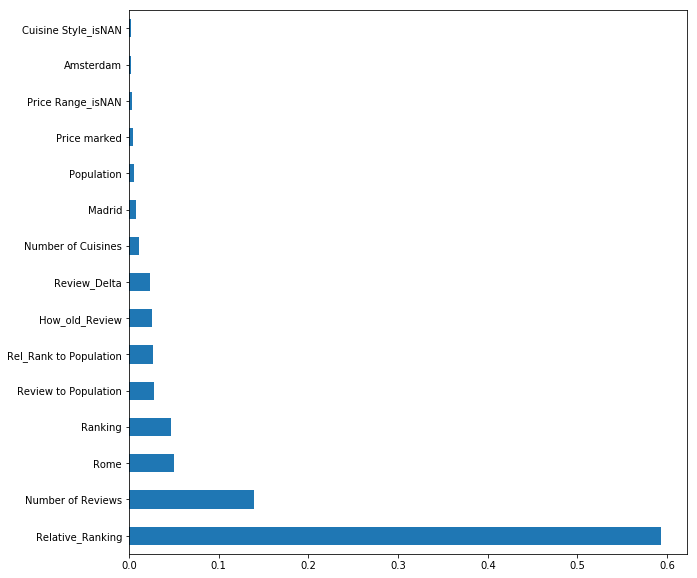

In [70]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [71]:
test_data.sample(10)

,Ranking,Number of Reviews,Rating,Number_of_Reviews_isNAN,Price Range_isNAN,Cuisine Style_isNAN,Amsterdam,Athens,Barcelona,Berlin,...,Warsaw,Zurich,Price marked,Number of Cuisines,Review_Delta,How_old_Review,Relative_Ranking,Population,Review to Population,Rel_Rank to Population
6236,1811.0,2.0,0.0,0,1,1,0,0,0,0,...,0,0,2,3,-326,380,1.773751,2965,0.000675,0.000598
6416,4432.0,202.0,0.0,0,0,0,0,0,0,0,...,0,0,1,2,67,1138,1.711858,3900,0.051795,0.000439
1004,3173.0,4.0,0.0,0,1,0,0,0,0,0,...,0,0,2,1,-90,144,1.177803,3218,0.001243,0.000366
412,1465.0,33.0,0.0,0,0,0,0,0,0,0,...,0,0,2,2,6,972,1.752392,1347,0.024499,0.001301
1618,1933.0,4.0,0.0,0,1,0,0,0,0,0,...,0,0,2,1,4,50,1.688210,1471,0.002719,0.001148
5974,1632.0,51.0,0.0,0,0,0,1,0,0,0,...,0,0,2,4,30,143,1.189504,827,0.061669,0.001438
384,154.0,283.0,0.0,0,0,0,0,0,0,0,...,0,0,2,3,18,140,0.188034,1308,0.216361,0.000144
6518,2684.0,0.0,0.0,1,1,1,0,0,0,0,...,0,0,2,3,4,50,2.263069,1841,0.000000,0.001229
5135,5569.0,22.0,0.0,0,1,1,0,0,1,0,...,0,0,2,3,253,707,1.640353,3186,0.006905,0.000515
8740,301.0,324.0,0.0,0,0,0,0,0,1,0,...,0,0,2,7,1,141,0.088660,3186,0.101695,0.000028


In [72]:
test_data = test_data.drop(['Rating'], axis=1)

In [73]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [74]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [75]:
predict_submission

array([3.05 , 4.23 , 4.44 , ..., 3.065, 4.495, 4.35 ])

In [76]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.050
1,id_1,4.230
2,id_2,4.440
3,id_3,4.250
4,id_4,4.485
5,id_5,4.485
6,id_6,2.965
7,id_7,2.215
8,id_8,4.155
9,id_9,4.640
